In [1]:
import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
eth_ticker = yf.Ticker("ETH-USD")
csv_file = "eth.csv"

# Check if the CSV file exists and delete it if it does
if os.path.exists(csv_file):
    os.remove(csv_file)

# Fetch the historical data for Ethereum
eth = eth_ticker.history(period="max")
eth.to_csv(csv_file)

# Load the data from the CSV file into a DataFrame
eth = pd.read_csv(csv_file, index_col=0)
eth

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,0.0,0.0
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,0.0,0.0
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992,0.0,0.0
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936,0.0,0.0
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,3479.785645,3589.887451,3473.452637,3565.549561,12733651076,0.0,0.0
2024-06-16 00:00:00+00:00,3566.761963,3648.093018,3541.534424,3620.563477,9878388158,0.0,0.0
2024-06-17 00:00:00+00:00,3622.383545,3634.285400,3468.148926,3511.378906,17838856988,0.0,0.0


<Axes: xlabel='Date'>

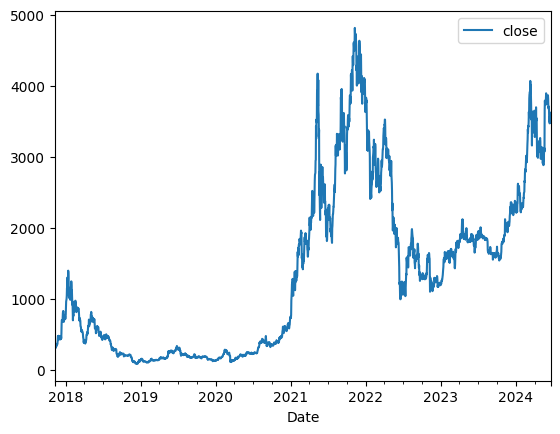

In [3]:
# Convert index to datetime
eth.index = pd.to_datetime(eth.index)

# Remove unnecessary columns
del eth["Dividends"]
del eth["Stock Splits"]

# Convert column names to lowercase
eth.columns = [c.lower() for c in eth.columns]

# Plot the closing price
eth.plot.line(y="close", use_index=True)

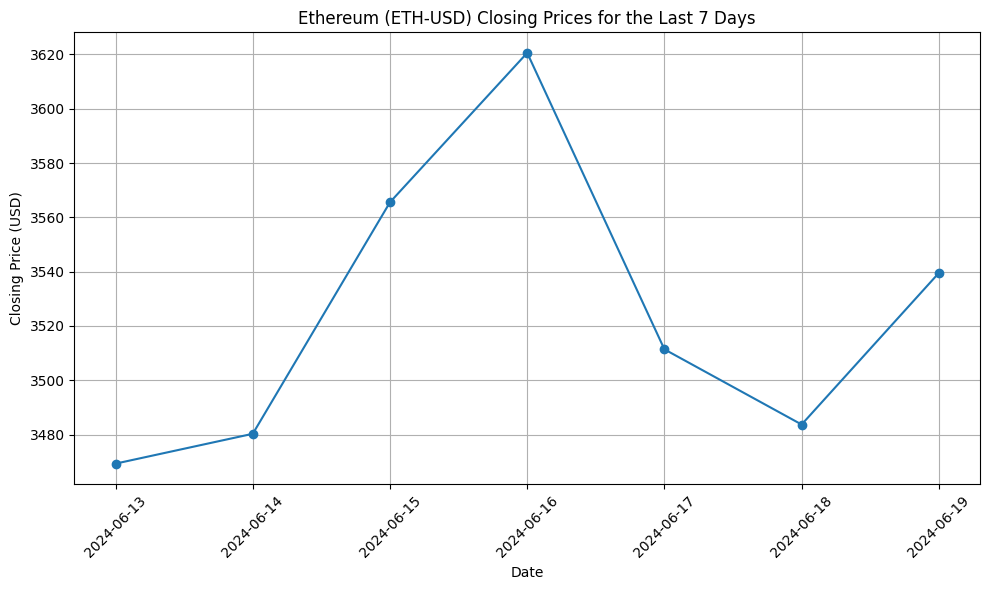

In [4]:
# Filter the data for the last seven days
last_seven_days_eth = eth[-7:]

# Plot the closing price for the last seven days
plt.figure(figsize=(10, 6))
plt.plot(last_seven_days_eth.index, last_seven_days_eth['close'], marker='o')
plt.title('Ethereum (ETH-USD) Closing Prices for the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
wiki = pd.read_csv("ethereum_sentiment.csv", index_col=0, parse_dates=True)
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.000000,0.000000,0.000000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-06-15,0.533333,0.066103,0.108333
2024-06-16,0.533333,0.066103,0.108333
2024-06-17,0.533333,0.066103,0.108333
2024-06-18,0.533333,0.066103,0.108333


In [6]:
# Assuming 'eth' dataframe has a timezone-aware datetime index
# Localize timezone for 'wiki' dataframe if it's tz-naive
if wiki.index.tz is None:
    wiki.index = wiki.index.tz_localize('UTC')

# Merge the dataframes
eth = eth.merge(wiki, left_index=True, right_index=True)

# Continue with the rest of your code
eth["tomorrow"] = eth["close"].shift(-1)
eth["target"] = (eth["tomorrow"] > eth["close"]).astype(int)
eth["target"].value_counts()


target
1    1238
0    1177
Name: count, dtype: int64

In [7]:
eth

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,0.900000,-0.144123,0.261111,299.252991,0
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,0.966667,-0.177429,0.294444,314.681000,1
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992,0.966667,-0.177429,0.294444,307.907990,0
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936,0.966667,-0.177429,0.294444,316.716003,1
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,1.100000,-0.209260,0.327778,337.631012,1
...,...,...,...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,3479.785645,3589.887451,3473.452637,3565.549561,12733651076,0.533333,0.066103,0.108333,3620.563477,1
2024-06-16 00:00:00+00:00,3566.761963,3648.093018,3541.534424,3620.563477,9878388158,0.533333,0.066103,0.108333,3511.378906,0
2024-06-17 00:00:00+00:00,3622.383545,3634.285400,3468.148926,3511.378906,17838856988,0.533333,0.066103,0.108333,3483.681396,0
2024-06-18 00:00:00+00:00,3510.565186,3514.177246,3371.590332,3483.681396,21022514455,0.533333,0.066103,0.108333,3539.494873,1


In [8]:
eth.to_csv('ethSentimet.csv')